# GA run report

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from IPython import display

In [3]:
specimens = [x for x in os.listdir() if x[0] == '0' or x[0] == '1']
print(f"{len(specimens)} specimens meeting basic conditions of no self-intersecting airfoils being far enough (2*BL) from each other")

617 specimens meeting basic conditions of no self-intersecting airfoils being far enough (2*BL) from each other


In [4]:
specimens_df = pd.DataFrame(columns= ['name', 'creation_date', 'CL', 'CD', 'CL/CD', 'iterations', 'time'])
cwd = os.getcwd()
bad_specimens = 0

for specimen in specimens:
    casefolder = cwd + '/' + specimen
    creation_date = os.stat(casefolder).st_ctime

    if not os.path.isfile(casefolder + '/results.txt'):
        bad_specimens+=1
        continue

    iterations = max(map(lambda x: int(x), filter(lambda x: re.match(r"^[0-9]+$", x), os.listdir(path=casefolder))))

    with open(casefolder + '/results.txt', 'r') as resultfile:
        cl = float(resultfile.readline().split()[1])
        cd = float(resultfile.readline().split()[1])
        clcd = float(resultfile.readline().split()[1])
        t = float(resultfile.readline().split()[1])

        specimens_df = specimens_df.append(pd.Series([str(specimen), creation_date, cl, cd, clcd, iterations, t], index=['name', 'creation_date', 'CL', 'CD', 'CL/CD', 'iterations', 'time']), ignore_index=True)

specimens_df['creation_date'] = pd.to_datetime(specimens_df['creation_date'], unit='s')

print(f"{bad_specimens} ({100 * bad_specimens / len(specimens)}%) specimens had meshing/mesh conversion/solver error")

18 (2.9173419773095626%) specimens had meshing/mesh conversion/solver error


## Run information

Text(0.5, 0, 'creation date, approximately growing with generations')

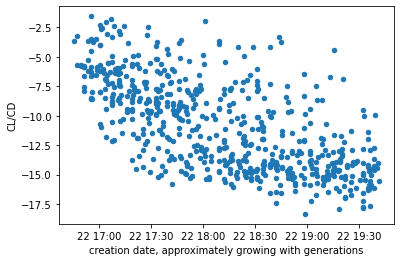

In [5]:
allspecs = specimens_df.plot(x='creation_date', y='CL/CD', kind='scatter')
allspecs.set_xlabel('creation date, approximately growing with generations')

The winning specimen:

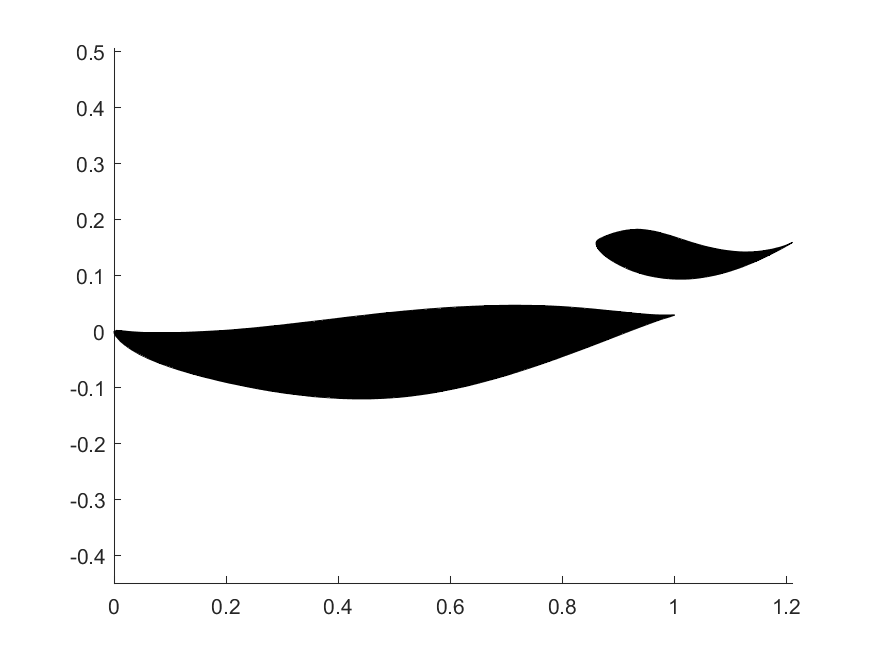

In [6]:
display.Image(specimens_df.loc[specimens_df['CL/CD'] == min(specimens_df['CL/CD']), 'name'].values[0] + '/geometry.png')

## Evaluation of results quality
Many specimens reached iteration limit set in the solver configuration, suggesting some results might not be precise

<AxesSubplot:xlabel='creation_date', ylabel='CL/CD'>

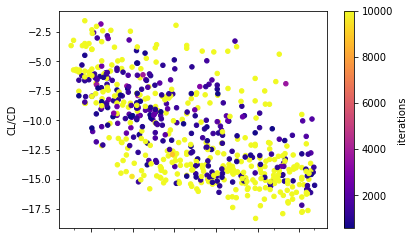

In [7]:
specimens_df.plot(x='creation_date', y='CL/CD', kind='scatter', c='iterations', cmap='plasma')

In [8]:
specimens_df_well_converged = specimens_df[specimens_df['iterations'] != 10000]
limitreached = sum(specimens_df['iterations'] == 10000)
print(f"{limitreached} ({100 * limitreached / len(specimens)}%) specimens reached solver iteration limit of 10000")

334 (54.13290113452188%) specimens reached solver iteration limit of 10000


After filtering out those we get the following specimens:

<AxesSubplot:xlabel='creation_date', ylabel='CL/CD'>

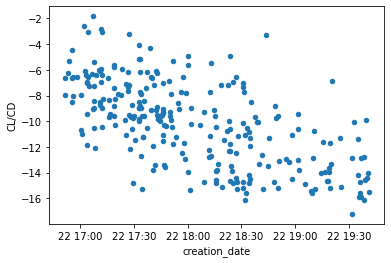

In [9]:
specimens_df_well_converged.plot(x='creation_date', y='CL/CD', kind='scatter')

The winning specimen with <10000 iteration convergence:

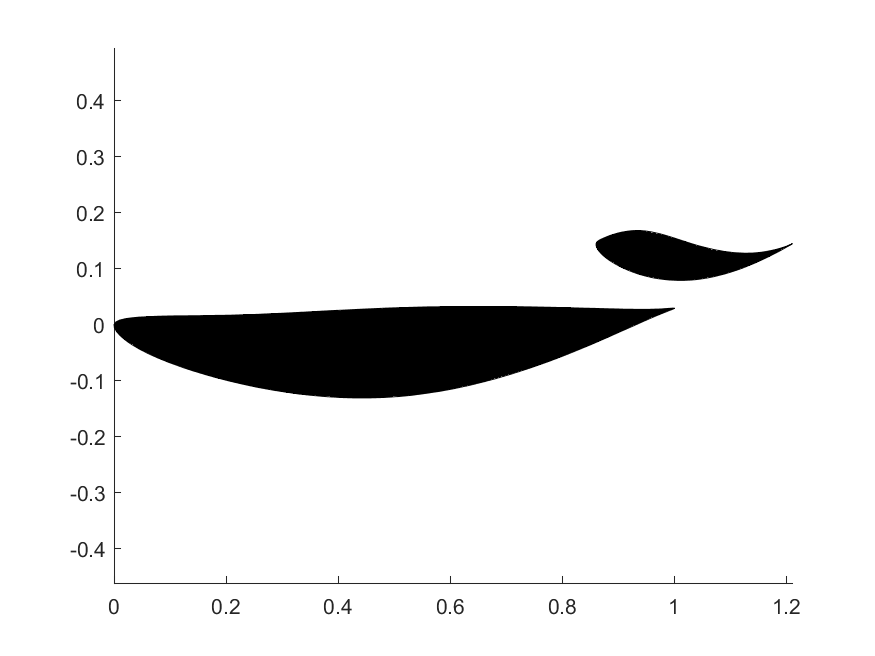

In [10]:
display.Image(specimens_df_well_converged.loc[specimens_df_well_converged['CL/CD'] == min(specimens_df_well_converged['CL/CD']), 'name'].values[0] + '/geometry.png')

CL plot (no optimization for both CL and CL/CD yet)

<AxesSubplot:xlabel='creation_date', ylabel='CL'>

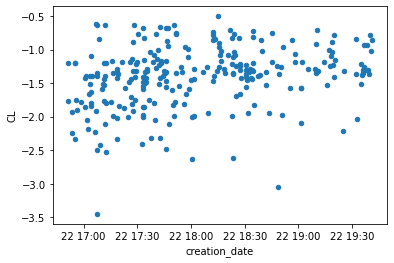

In [11]:
specimens_df_well_converged.plot(x='creation_date', y='CL', kind='scatter')